## Gráficos

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('../0_datasets/census.csv')
dataset.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### Gráficos de dispersão

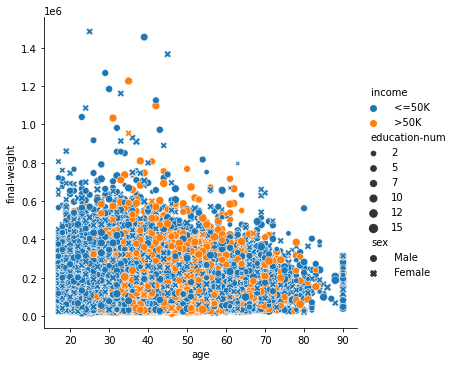

In [7]:
sns.relplot(x='age', y='final-weight', data=dataset,
            hue='income',
            style='sex',
            size='education-num'
           )

#### Gráfico de barra e setor (pizza)

<AxesSubplot:xlabel='sex', ylabel='final-weight'>

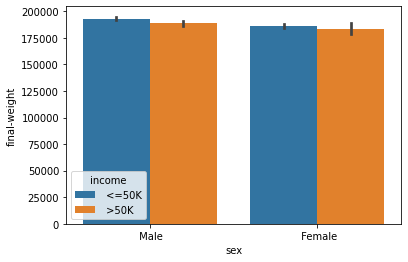

In [10]:
sns.barplot(x='sex', y='final-weight', data=dataset, hue='income')

In [12]:
dados_agrupados = dataset.groupby(['income'])['education-num'].sum()
dados_agrupados

income
 <=50K    237190
 >50K      91047
Name: education-num, dtype: int64

<AxesSubplot:xlabel='income'>

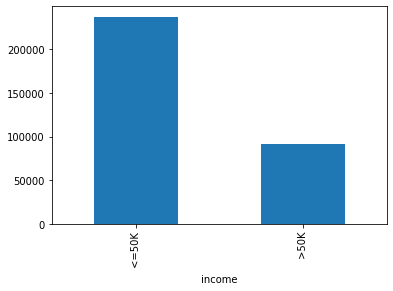

In [13]:
dados_agrupados.plot.bar()

<AxesSubplot:ylabel='education-num'>

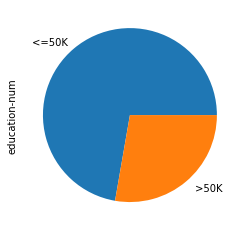

In [14]:
dados_agrupados.plot.pie()

#### Gráfico de linha

In [17]:
vendas = {
    'mes': np.array([1,2,3,4,5,6,7,8,9,10,12,12]),
    'valor': np.array([100,200,120,300,500,198,200,209,130,500,300,120])
}

In [18]:
vendas_df = pd.DataFrame(vendas)
vendas_df

,mes,valor
0,1,100
1,2,200
2,3,120
3,4,300
4,5,500
5,6,198
6,7,200
7,8,209
8,9,130
9,10,500


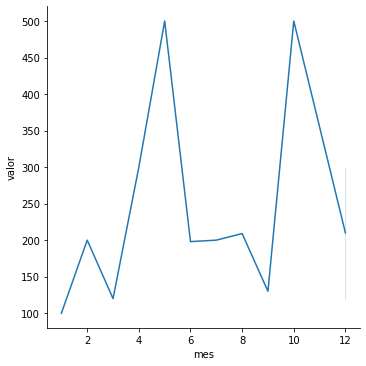

In [19]:
sns.relplot(x='mes', y='valor', kind='line', data=vendas_df)

In [20]:
#### Boxplot

c:\users\alisson\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

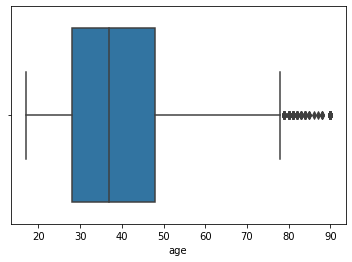

In [21]:
sns.boxplot(dataset['age'])

c:\users\alisson\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education-num'>

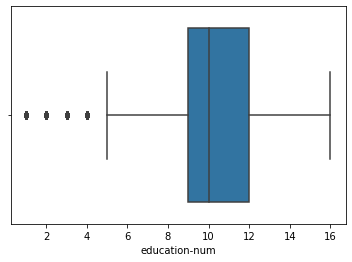

In [22]:
sns.boxplot(dataset['education-num'])

In [23]:
dataset2 = dataset.iloc[:,[0,4,12]]
dataset2.head()

,age,education-num,hour-per-week
0,39,13,40
1,50,13,13
2,38,9,40
3,53,7,40
4,28,13,40


<AxesSubplot:>

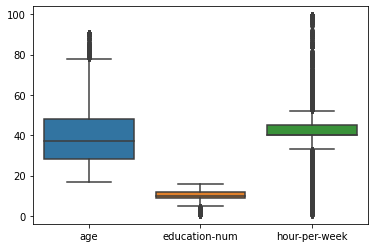

In [25]:
sns.boxplot(data=dataset2)

### Atributos categóricos
#### Catplot

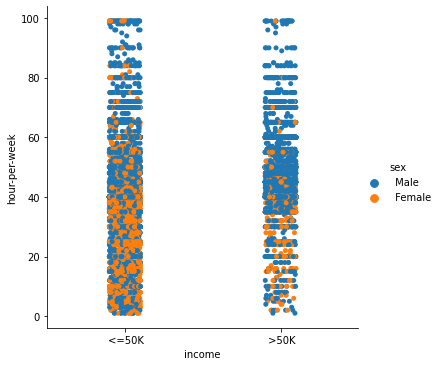

In [28]:
sns.catplot(x='income', y='hour-per-week', data=dataset, hue='sex')

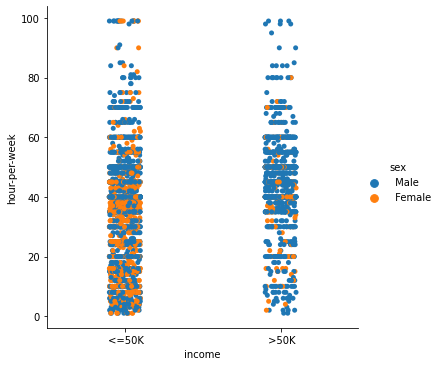

In [31]:
sns.catplot(x='income', y='hour-per-week', data=dataset.query('age > 50'), hue='sex')

### Subgráficos

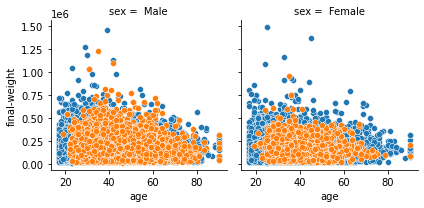

In [34]:
g = sns.FacetGrid(dataset, col='sex', hue='income')
g.map(sns.scatterplot, 'age', 'final-weight')

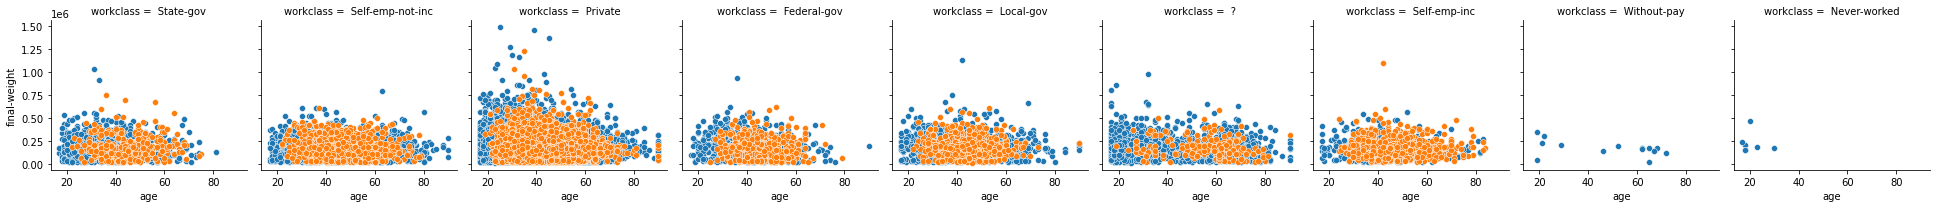

In [35]:
g = sns.FacetGrid(dataset, col='workclass', hue='income')
g.map(sns.scatterplot, 'age', 'final-weight')

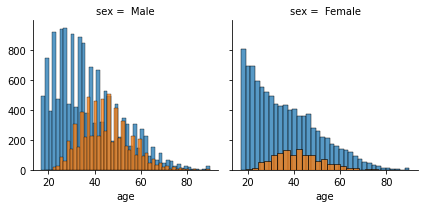

In [36]:
g = sns.FacetGrid(dataset, col='sex', hue='income')
g.map(sns.histplot, 'age')

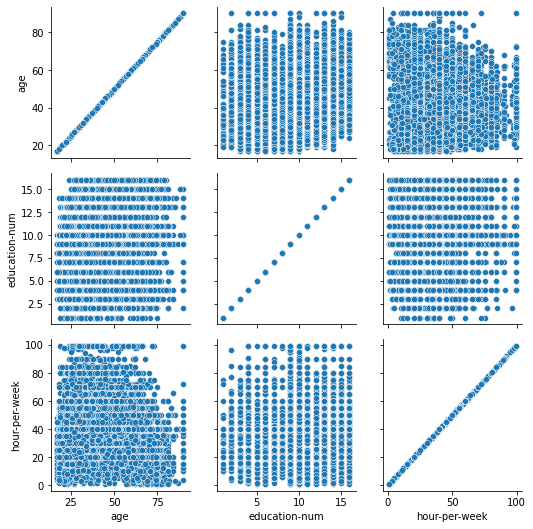

In [37]:
g = sns.PairGrid(dataset2)
g.map(sns.scatterplot)

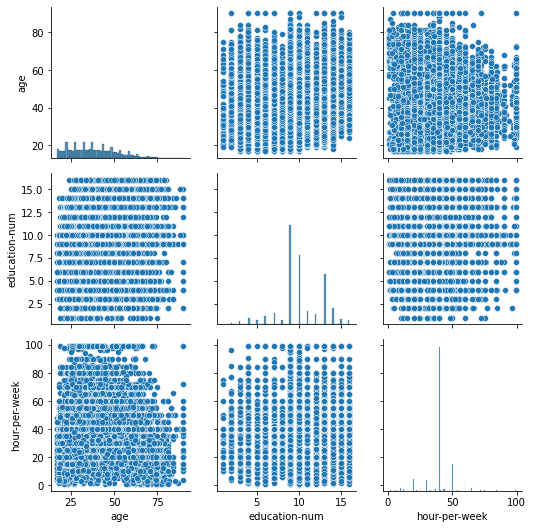

In [40]:
g = sns.PairGrid(dataset2)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)